In [1]:
# 1. Configuração e Carregamento dos Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../01_Base_Dados/AmesHousing.csv') 
print("Dados carregados. Shape:", df.shape)

Dados carregados. Shape: (2930, 82)


In [3]:
# 2. Limpeza Inicial (Remoção da Coluna de ID 'Order')
df = df.drop('Order', axis=1)

In [4]:
# 3. Análise de Nulos
nulos_por_coluna = df.isnull().sum().sort_values(ascending=False)
nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]
print("\nTop 15 Colunas com Valores Ausentes:")
print(nulos_por_coluna.head(15))


Top 15 Colunas com Valores Ausentes:
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Finish      159
Garage Yr Blt      159
Garage Qual        159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
dtype: int64


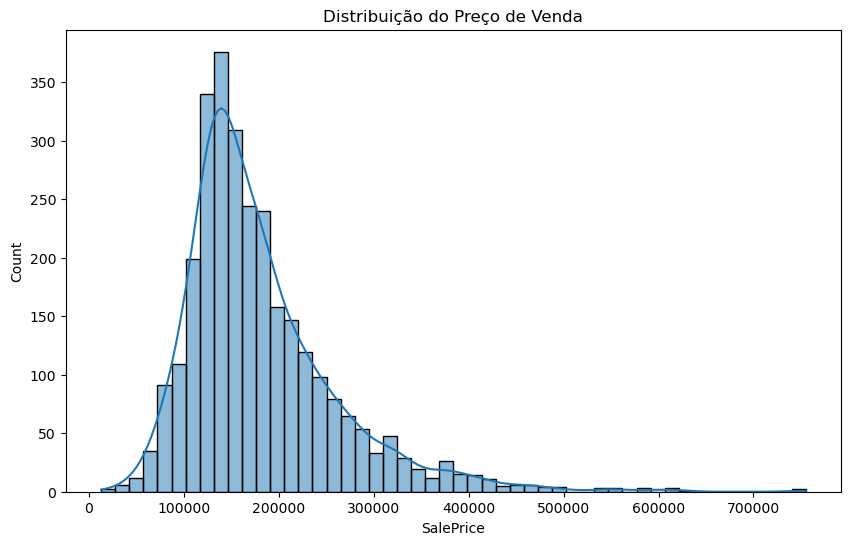

In [5]:
# 4. Análise da Variável Alvo 'SalePrice'
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=50)
plt.title('Distribuição do Preço de Venda')
plt.show() 

In [6]:
# 5. Análise de Correlação
corr_matrix = df.select_dtypes(include=np.number).corr()
top_corr = corr_matrix['SalePrice'].sort_values(ascending=False).head(6) 
print("\nTop 5 Correlações com SalePrice:")
print(top_corr)


Top 5 Correlações com SalePrice:
SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647877
Garage Area      0.640401
Total Bsmt SF    0.632280
Name: SalePrice, dtype: float64


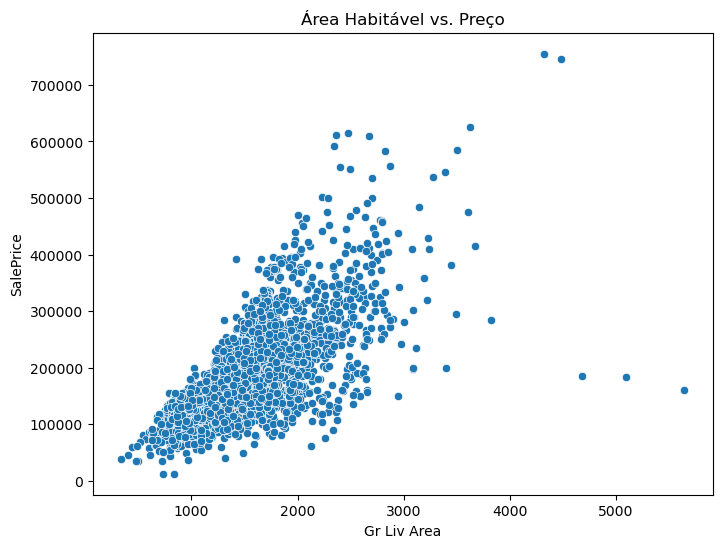

In [7]:
# 6. Identificação de Outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('Área Habitável vs. Preço')
plt.show() 
# Pontos em 'Gr Liv Area' > 4000 e 'SalePrice' baixo são outliers.